# Visu 9: Using FFT to find width

## Setup

In [1]:
import os
import matplotlib.pyplot as plt
import random
import imageio
import numpy as np
from amftrack.util.sys import storage_path

/home/ipausers/kahane/Wks/AMFtrack/amftrack/util/dbx.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
path = os.path.join(storage_path, "test_precise_1")
im_path = os.path.join(path, "slices.png")
label_path = os.path.join(path, "labels.npy")

In [3]:
im = imageio.imread(im_path)
print(im.shape)

(224, 120)


In [4]:
with open(label_path, "rb") as f:
    label = np.load(f)
print(label.shape)

(224,)


In [5]:
label = np.expand_dims(label, axis=1)

In [6]:
label.shape

(224, 1)

## Visualisation

In [7]:
i = random.randint(0, 224)

In [8]:
i = 68

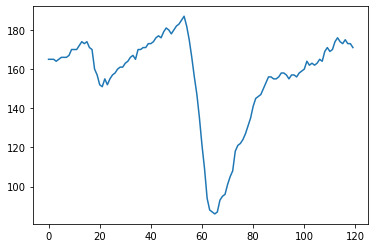

In [9]:
plt.plot(im[i, :])

## FFT

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
i = random.randint(0, 224)

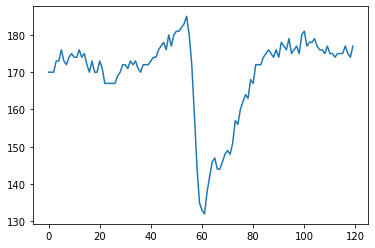

In [14]:
plt.plot(im[i, :])

In [20]:
point = im[i, :] - np.mean(im[i, :])

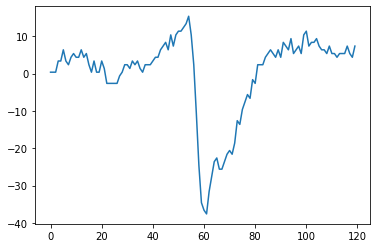

In [21]:
plt.plot(point)

In [16]:
label[i, 0]  # in micrometers, not in pixels

4.771114256648963

### signal

In [22]:
freq_of_interest = 1 / (label[i, 0] * 2 / 3.45)

In [23]:
freq_of_interest

0.3615507630311017

Plot of the module

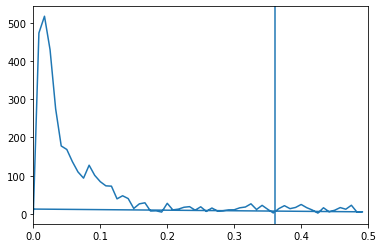

In [29]:
t = np.arange(120)
# sp = np.fft.fft(np.sin(t))
sp = np.fft.fft(point)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, np.abs(sp))
plt.xlim(0, 0.5)
plt.axvline(x=freq_of_interest)
plt.show()

Plot of the imaginary part

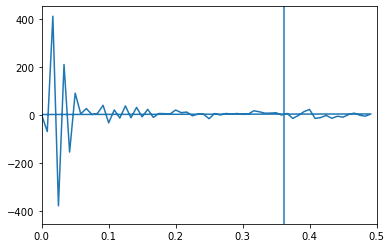

In [25]:
plt.plot(freq, sp.imag)
plt.axvline(x=freq_of_interest)
plt.xlim(0, 0.5)
plt.show()

In [30]:
inv = sp = np.fft.ifft(sp)

### Remvoing the zero component

TODO